In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

In [ ]:
df = pd.read_csv('station_153211-2022-09_2023-01.csv')
df['created_at'] = pd.to_datetime(df['created_at'])
df1 = df.copy()
df1['created_at'] = df1['created_at'].dt.floor('min')
df3 = pd.to_datetime(df1['created_at']).dt.time
start = pd.to_datetime('2022-09-01 00:00:00')
end = pd.to_datetime('2023-01-05 11:00:00')
dates = pd.date_range(start=start, end=end, freq='1min')
df4 = df1.groupby(['created_at'], as_index=False).median()
df4 = df4.set_index('created_at').reindex(dates).reset_index().reindex(columns=df4.columns)
df4['created_at'] = dates
df4.fillna(method='pad', inplace=True)
df4.fillna(method='bfill', inplace=True)
df5 = df4[df4.index %60 == 0]
df5.index = (df5.index/60)
df5.index = df5.index.astype(int)
df6 = df5.copy()
df6 = df6.drop(columns=['station_id', 'outlet_count','offline_count','occupied_count','unknown_count'])

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


                     available_count
created_at                          
2022-09-02 22:00:00              2.0
6.604932124809028e-12


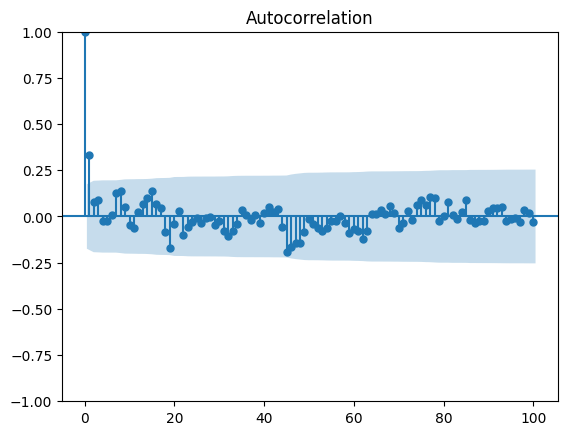

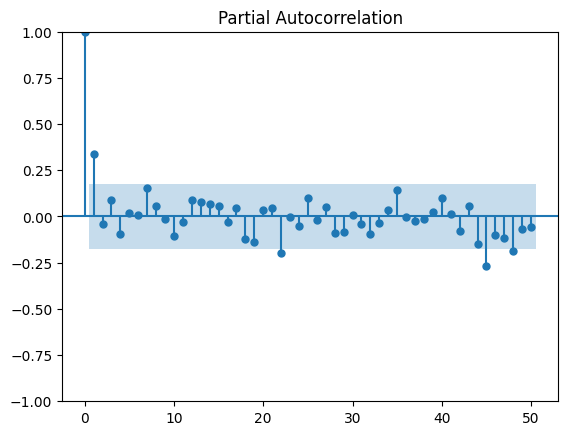

In [ ]:
df_22 = df6[(df6.index+4) %24 == 0]
df_22.set_index('created_at', inplace = True)
adftest = adfuller(df_22['available_count'])

acf_plot = plot_acf(df_22['available_count'], lags = 100)
pacf_plot = plot_pacf(df_22['available_count'], lags = 50)
  
print(df_22[1:2])
print(adftest[1])

<Axes: xlabel='created_at'>

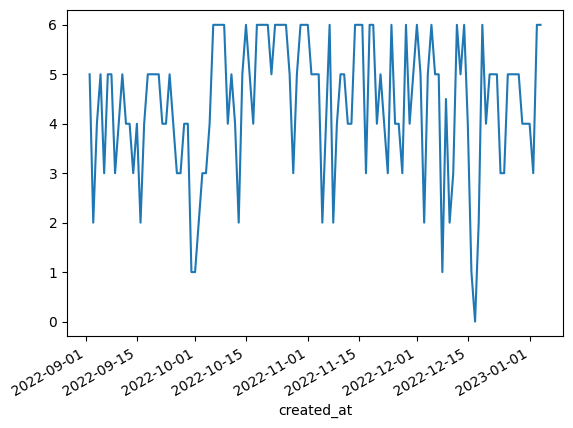

In [ ]:
available_count = df_22['available_count']
available_count[:-1].plot()

In [ ]:
train_end = int(len(df_22)*0.8)
test_end = int(len(df_22))
train_data = df_22.available_count[:train_end]
test_data = df_22.available_count[train_end: test_end]

In [ ]:
#AR
rolling_predictions_AR_22 = []


for i in range(len(test_data)):

    train_data = df_22.available_count[i:train_end+i]
    test_datum = test_data.index[i]

    model_AR_22 = sm.tsa.arima.ARIMA(train_data, order=(1, 0, 0))
    model_fit_AR_22 = model_AR_22.fit()

    pred_AR_22 = model_fit_AR_22.predict(start=test_data.index[i], end=test_data.index[i])

    rolling_predictions_AR_22.append(pred_AR_22)


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

In [ ]:
print(len(test_data))

26


In [ ]:
#without rolling window
train_data = df_22.available_count[:train_end]
test_data = df_22.available_count[train_end: test_end]
model_AR_22_no_rolling = sm.tsa.arima.ARIMA(train_data, order=(1, 0, 0))
model_fit_AR_22_no_rolling = model_AR_22_no_rolling.fit()
    
    # Make a prediction for the current test datum
pred_AR_22_no_rolling = model_fit_AR_22_no_rolling.predict(start=test_data.index[0], end=test_data.index[(len(test_data)-1)])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
newarray_AR =[]
for i in range(len(rolling_predictions_AR_22)):
  #print(rolling_predictions_AR_23[i][0])
  newarray_AR.append(rolling_predictions_AR_22[i][0])
print(newarray_AR)

[3.704552130317968, 3.942419446628392, 4.926723230720755, 4.631790015991155, 4.959530986632631, 4.332592894571621, 3.327133127845806, 2.66311429533964, 3.4190349122237746, 5.009335917535972, 4.246824018724112, 4.6234540126057375, 4.627088210073641, 4.642369917038234, 3.887628213891625, 3.899208662109553, 4.650439541913945, 4.650439541907563, 4.6504395419335856, 4.650439541825116, 4.274066242210735, 4.274066242276425, 4.276691061989145, 3.8862182409679713, 4.992055047885958, 5.012537391769905]


In [ ]:
df_22_AR_new = pd.DataFrame({'test_value': test_data, 'prediction_AR':newarray_AR})
df_22_AR_new['residual'] = df_22_AR_new['test_value'] - df_22_AR_new['prediction_AR']
df_22_AR_new['truncate'] = df_22_AR_new['prediction_AR'].round().astype(int)
df_22_AR_new['truncated_residual'] = df_22_AR_new['test_value'] - df_22_AR_new['truncate']
df_22_AR_new.head()

,test_value,prediction_AR,residual,truncate,truncated_residual
created_at,,,,,
2022-12-10 22:00:00,3.0,3.704552,-0.704552,4,-1.0
2022-12-11 22:00:00,6.0,3.942419,2.057581,4,2.0
2022-12-12 22:00:00,5.0,4.926723,0.073277,5,0.0
2022-12-13 22:00:00,6.0,4.631790,1.368210,5,1.0
2022-12-14 22:00:00,4.0,4.959531,-0.959531,5,-1.0


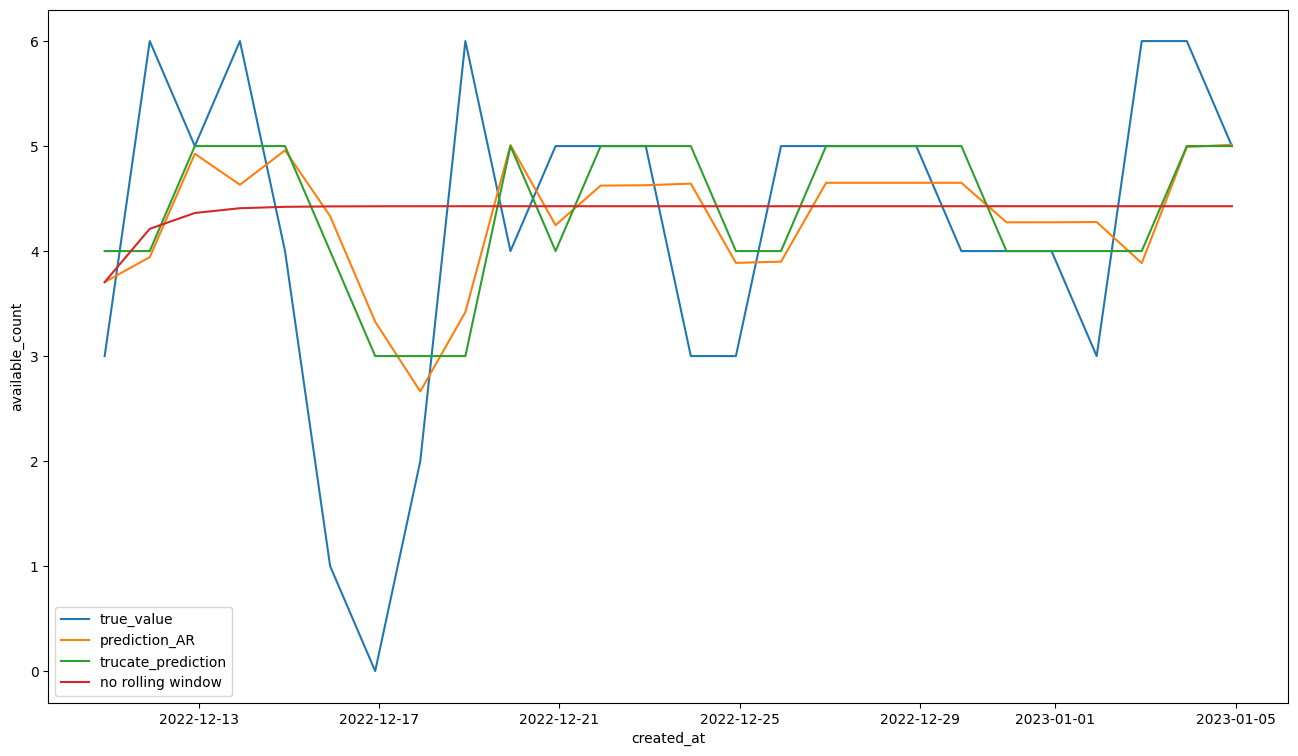

In [ ]:
plt.figure(figsize = (16,9))
plt.plot(df_22_AR_new['test_value'], label ='true_value')
plt.plot(df_22_AR_new['prediction_AR'], label ='prediction_AR')
plt.plot(df_22_AR_new['truncate'], label ='trucate_prediction')
plt.plot(pred_AR_22_no_rolling, label = "no rolling window")
plt.xlabel('created_at')
plt.ylabel('available_count')
plt.legend()
plt.show()

In [ ]:
rms_22_AR = np.sqrt(np.mean(df_22_AR_new['residual']**2))
print(rms_22_AR)

1.4063465440842249


In [ ]:
train_data = df_22.available_count[:train_end]
test_data = df_22.available_count[train_end: test_end]
rolling_predictions_MA_22 = []

# Loop through the test data using a rolling window
for i in range(len(test_data)):
   
    train_data = df_22.available_count[i:train_end+i]
    test_datum = test_data.index[i]
    
    model_MA_22 = sm.tsa.arima.ARIMA(train_data, order=(0, 0, 1))
    model_fit_MA_22 = model_MA_22.fit()

    pred_MA_22 = model_fit_MA_22.predict(start=test_data.index[i], end=test_data.index[i])

    rolling_predictions_MA_22.append(pred_MA_22)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

In [ ]:
#without rolling window
train_data = df_22.available_count[:train_end]
test_data = df_22.available_count[train_end: test_end]
model_MA_22_no_rolling = sm.tsa.arima.ARIMA(train_data, order=(0, 0, 1))
model_fit_MA_22_no_rolling = model_MA_22_no_rolling.fit()
    
    # Make a prediction for the current test datum
pred_MA_22_no_rolling = model_fit_MA_22_no_rolling.predict(start=test_data.index[0], end=test_data.index[(len(test_data)-1)])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
newarray_MA =[]
for i in range(len(rolling_predictions_MA_22)):
  #print(rolling_predictions_AR_23[i][0])
  newarray_MA.append(rolling_predictions_MA_22[i][0])
print(newarray_MA)

[3.6376374794578266, 4.239468523879651, 4.981633427650116, 4.468061764861474, 4.956106598587599, 4.195223747889535, 3.4084949949351664, 3.1538100931178796, 3.9410097664947417, 5.198606778258602, 3.9520921290606075, 4.785056552367762, 4.487666630773001, 4.626364758304727, 3.803611267210406, 4.120563257589299, 4.777121699724084, 4.532437108620152, 4.624690949356369, 4.590546094386746, 4.21384232836412, 4.351108101055457, 4.301678790058016, 3.9219903256323527, 5.193018055034076, 4.753800212450901]


In [ ]:
df_22_MA_new = pd.DataFrame({'test_value': test_data, 'prediction_MA':newarray_MA})
df_22_MA_new['residual_MA'] = df_22_MA_new['test_value'] - df_22_MA_new['prediction_MA']
df_22_MA_new['truncate'] = df_22_MA_new['prediction_MA'].round().astype(int)
df_22_MA_new['truncated_residual'] = df_22_MA_new['test_value'] - df_22_MA_new['truncate']
df_22_MA_new.head()

,test_value,prediction_MA,residual_MA,truncate,truncated_residual
created_at,,,,,
2022-12-10 22:00:00,3.0,3.637637,-0.637637,4,-1.0
2022-12-11 22:00:00,6.0,4.239469,1.760531,4,2.0
2022-12-12 22:00:00,5.0,4.981633,0.018367,5,0.0
2022-12-13 22:00:00,6.0,4.468062,1.531938,4,2.0
2022-12-14 22:00:00,4.0,4.956107,-0.956107,5,-1.0


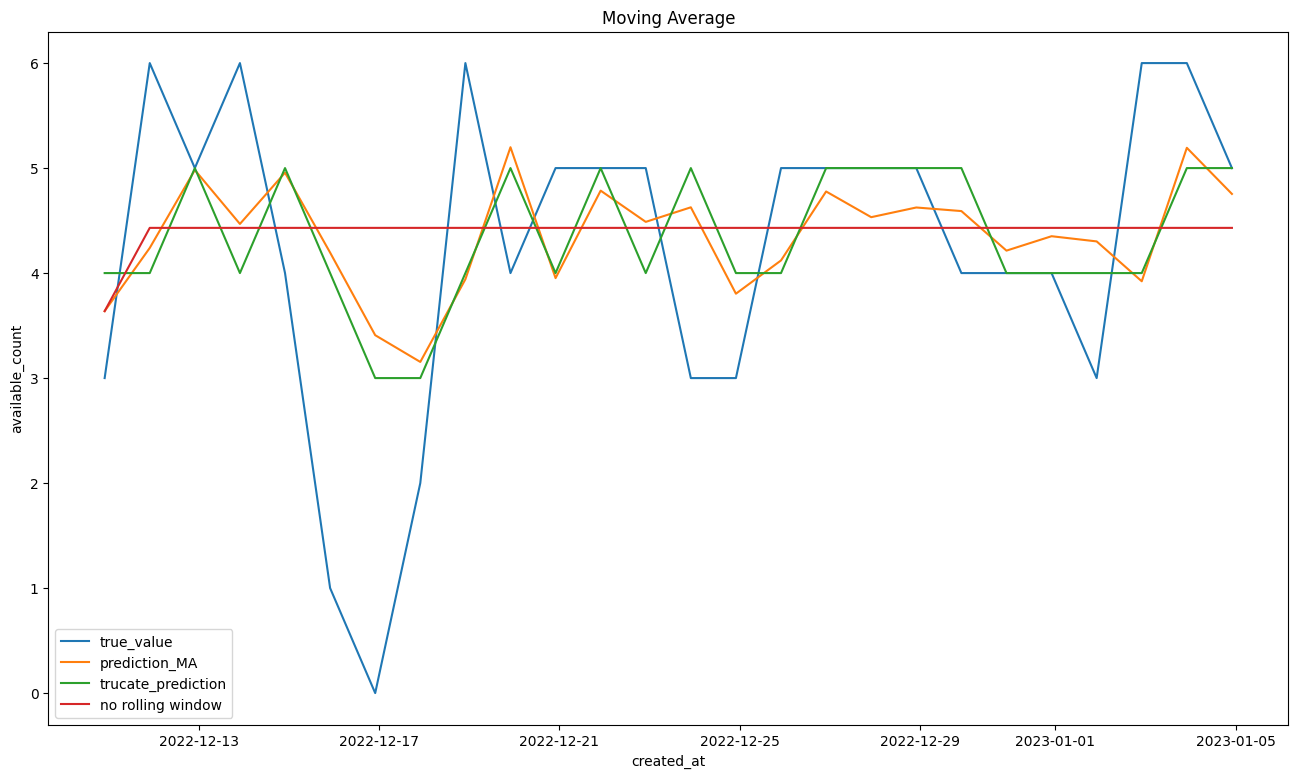

In [ ]:
plt.figure(figsize = (16,9))
plt.title("Moving Average")
plt.plot(df_22_MA_new['test_value'], label ='true_value')
plt.plot(df_22_MA_new['prediction_MA'], label ='prediction_MA')
plt.plot(df_22_MA_new['truncate'], label ='trucate_prediction')
plt.plot(pred_MA_22_no_rolling, label = "no rolling window")
plt.xlabel('created_at')
plt.ylabel('available_count')
plt.legend()
plt.show()

In [ ]:
rms_22_MA = np.sqrt(np.mean(df_22_MA_new['residual_MA']**2))
print(rms_22_MA)

1.3689456433254088


In [ ]:
#ARMA
train_data = df_22.available_count[:train_end]
test_data = df_22.available_count[train_end: test_end]
rolling_predictions_ARMA_22 = []

# Loop through the test data using a rolling window
for i in range(len(test_data)):
   
    train_data = df_22.available_count[i:train_end+i]
    test_datum = test_data.index[i]
    
    model_ARMA_22 = sm.tsa.arima.ARIMA(train_data, order=(1, 0, 1))
    model_fit_ARMA_22 = model_ARMA_22.fit()

    pred_ARMA_22 = model_fit_ARMA_22.predict(start=test_data.index[i], end=test_data.index[i])

    rolling_predictions_ARMA_22.append(pred_ARMA_22)

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

In [ ]:
#without rolling window
train_data = df_22.available_count[:train_end]
test_data = df_22.available_count[train_end: test_end]
model_ARMA_22_no_rolling = sm.tsa.arima.ARIMA(train_data, order=(1, 0, 1))
model_fit_ARMA_22_no_rolling = model_ARMA_22_no_rolling.fit()
    
    # Make a prediction for the current test datum
pred_ARMA_22_no_rolling = model_fit_ARMA_22_no_rolling.predict(start=test_data.index[0], end=test_data.index[(len(test_data)-1)])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
newarray_ARMA =[]
for i in range(len(rolling_predictions_ARMA_22)):
  #print(rolling_predictions_AR_23[i][0])
  newarray_ARMA.append(rolling_predictions_ARMA_22[i][0])
print(newarray_ARMA)

[3.6883475560664034, 3.674291823274875, 4.576236395981219, 4.663153013828872, 4.9644637627968144, 4.504786887940547, 3.3754971458575778, 2.6697521482151902, 3.3492580401240684, 5.165358607370206, 4.159607924643832, 4.6460944576149235, 4.612656176284262, 4.625737162114283, 3.822625162989683, 3.9677872143573714, 4.751577219992881, 4.599590089487269, 4.631854143349849, 4.626605944144639, 4.228695402864581, 4.303252530665931, 4.29142355457731, 3.8811035846216146, 5.113726963529418, 4.890604521503026]


In [ ]:
df_22_ARMA_new = pd.DataFrame({'test_value': test_data, 'prediction_ARMA':newarray_ARMA})
df_22_ARMA_new['residual_ARMA'] = df_22_ARMA_new['test_value'] - df_22_ARMA_new['prediction_ARMA']
df_22_ARMA_new['truncate'] = df_22_ARMA_new['prediction_ARMA'].round().astype(int)
df_22_ARMA_new['truncated_residual'] = df_22_ARMA_new['test_value'] - df_22_ARMA_new['truncate']
df_22_ARMA_new.head()

,test_value,prediction_ARMA,residual_ARMA,truncate,truncated_residual
created_at,,,,,
2022-12-10 22:00:00,3.0,3.688348,-0.688348,4,-1.0
2022-12-11 22:00:00,6.0,3.674292,2.325708,4,2.0
2022-12-12 22:00:00,5.0,4.576236,0.423764,5,0.0
2022-12-13 22:00:00,6.0,4.663153,1.336847,5,1.0
2022-12-14 22:00:00,4.0,4.964464,-0.964464,5,-1.0


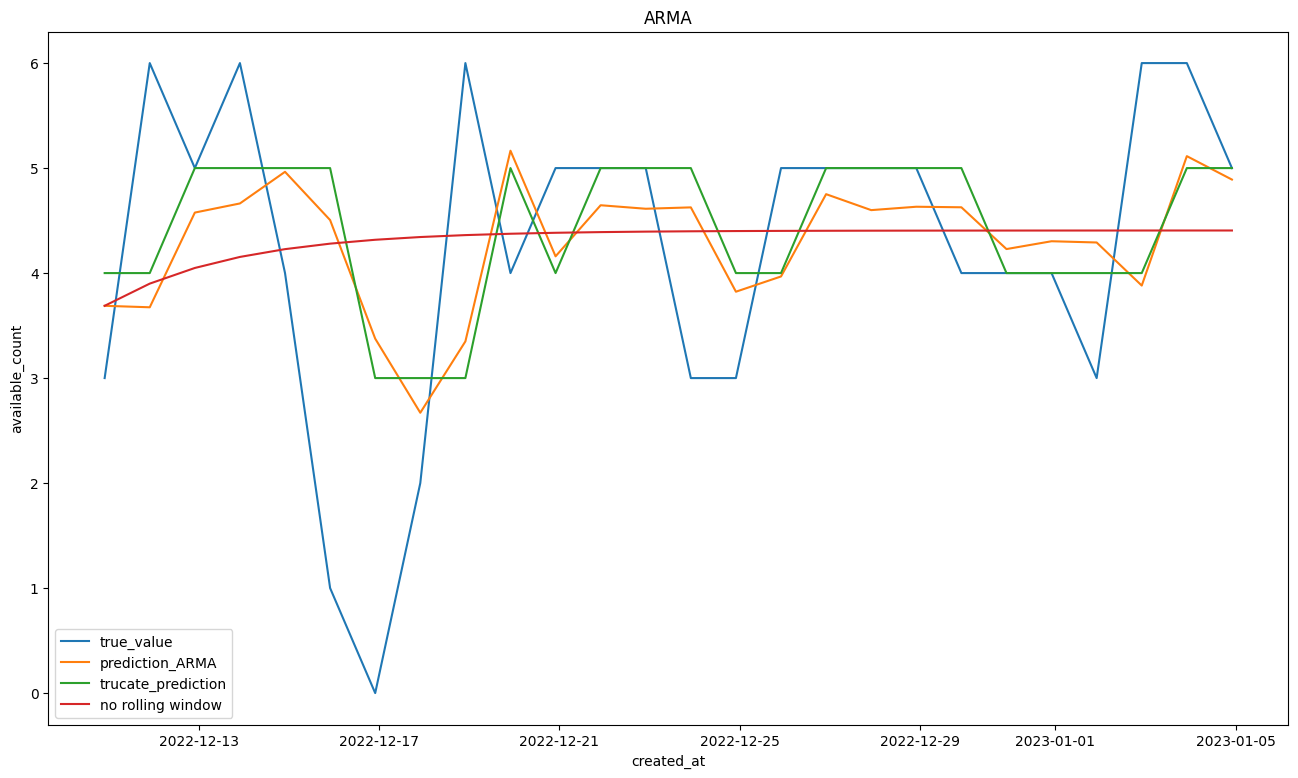

In [ ]:
plt.figure(figsize = (16,9))
plt.title("ARMA")
plt.plot(df_22_ARMA_new['test_value'], label ='true_value')
plt.plot(df_22_ARMA_new['prediction_ARMA'], label ='prediction_ARMA')
plt.plot(df_22_ARMA_new['truncate'], label ='trucate_prediction')
plt.plot(pred_ARMA_22_no_rolling, label = "no rolling window")
plt.xlabel('created_at')
plt.ylabel('available_count')
plt.legend()
plt.show()

In [ ]:
rms_22_MA = np.sqrt(np.mean(df_22_MA_new['residual_MA']**2))
print(rms_22_MA)

1.3689456433254088
